# Analogues Analysis ORA

In [1]:
import json
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from pathway_forte.constants import *
from pathway_forte.pathway_enrichment.functional_class import get_analogs_comparison_numbers

In [2]:
print(time.asctime())

Fri May 24 14:06:19 2019


In [3]:
brca_dataset = 'brca'
kirc_dataset = 'kirc'
lihc_dataset = 'lihc'
prad_dataset = 'prad'

In [4]:
def get_ora_results(dataset):
    """Get ORA results for KEGG, Reactome and WikiPathways for a dataset from JSON file. 
    """
    ORA = os.path.join("/Users/danieldomingo/Downloads/ora_geometric_results/")
    
    kegg_path = os.path.join(ORA, f'ora_geometric_kegg_{dataset}.json')
    reactome_path = os.path.join(ORA, f'ora_geometric_reactome_{dataset}.json')
    wikipathways_path = os.path.join(ORA, f'ora_geometric_wikipathways_{dataset}.json')
       
    kegg_df = pd.DataFrame()
    reactome_df = pd.DataFrame()
    wp_df = pd.DataFrame()

    with open(kegg_path) as f:
        kegg_data = json.load(f)        
        kegg_df['pathway_id'] = [
            pathway_id for pathway_id in list(kegg_data.keys())]
       
    with open(reactome_path) as f:
        reactome_data = json.load(f)        
        reactome_df['pathway_id'] = [
            pathway_id for pathway_id in list(reactome_data.keys())]

    with open(wikipathways_path) as f:
        wp_data = json.load(f)        
        wp_df['pathway_id'] = [
            pathway_id for pathway_id in list(wp_data.keys())]
        
    return kegg_df, reactome_df, wp_df

In [5]:
brca_kegg_df, brca_reactome_df, brca_wp_df = get_ora_results('brca')
kirc_kegg_df, kirc_reactome_df, kirc_wp_df = get_ora_results('kirc')
lihc_kegg_df, lihc_reactome_df, lihc_wp_df = get_ora_results('lihc')
prad_kegg_df, prad_reactome_df, prad_wp_df = get_ora_results('prad')

In [6]:
brca_actual_dict, brca_expected_dict = get_analogs_comparison_numbers(
    brca_kegg_df, 
    brca_reactome_df, 
    brca_wp_df, 
)
kirc_actual_dict, kirc_expected_dict = get_analogs_comparison_numbers(
    kirc_kegg_df, 
    kirc_reactome_df, 
    kirc_wp_df, 
)
lihc_actual_dict, lihc_expected_dict = get_analogs_comparison_numbers(
    lihc_kegg_df, 
    lihc_reactome_df, 
    lihc_wp_df, 
)
prad_actual_dict, prad_expected_dict = get_analogs_comparison_numbers(
    prad_kegg_df, 
    prad_reactome_df, 
    prad_wp_df, 
)

In [7]:
brca_actual_dict

{('kegg', 'reactome'): 20,
 ('kegg', 'wikipathways'): 25,
 ('reactome', 'kegg'): 20,
 ('reactome', 'wikipathways'): 13,
 ('wikipathways', 'kegg'): 25,
 ('wikipathways', 'reactome'): 13}

Plot how many pairwise pathways with mappings exist versus how many are expected

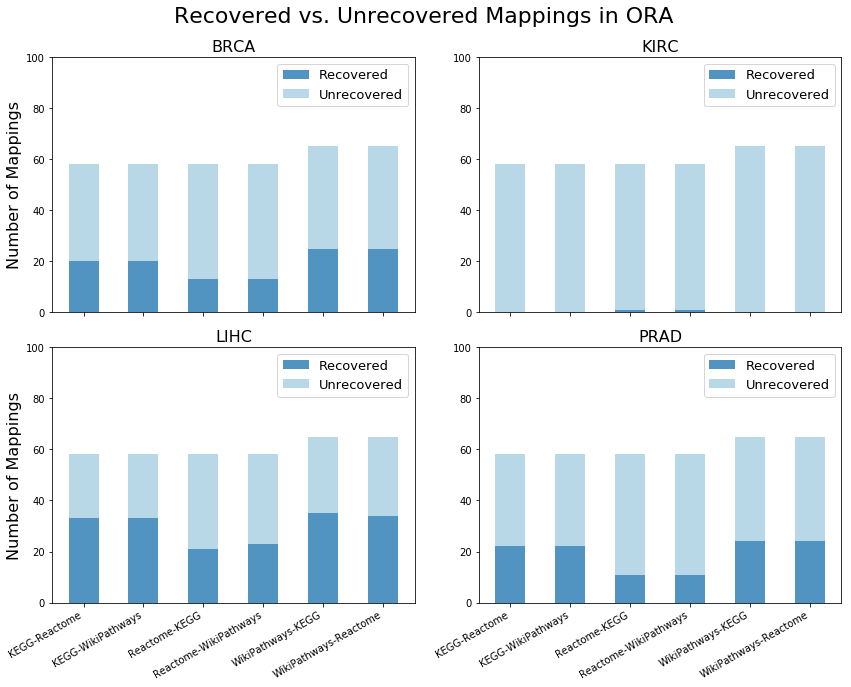

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
fig.suptitle('Recovered vs. Unrecovered Mappings in ORA', fontsize=22)

N = 6
index = np.arange(N)
bar_width = 0.5
opacity = 0.8

pairings = (
 'KEGG-Reactome', 
 'KEGG-WikiPathways', 
 'Reactome-KEGG', 
 'Reactome-WikiPathways',
 'WikiPathways-KEGG', 
 'WikiPathways-Reactome',
)
label_font = {'size': 16}

plt.subplot(2, 2, 1)
actual_vals = list(brca_actual_dict.values())
expected_vals = list(brca_expected_dict.values())
difference = [x - y for x, y in zip(expected_vals, actual_vals)]

p1 = plt.bar(index, actual_vals, bar_width,alpha=opacity, color='#2679b2',label='Recovered')
p2 = plt.bar(index, difference, bar_width, bottom=actual_vals, alpha=opacity, color='#a7cee2',label='Unrecovered')

plt.title('BRCA', fontsize=16)
plt.ylabel('Number of Mappings', fontdict=label_font)
plt.xticks(index, pairings)
plt.ylim(0,100)
plt.legend(prop={'size':13},loc=1)


plt.subplot(2, 2, 2)
actual_vals = list(kirc_actual_dict.values())
expected_vals = list(kirc_expected_dict.values())
difference = [x - y for x, y in zip(expected_vals, actual_vals)]

p1 = plt.bar(index, actual_vals, bar_width,alpha=opacity, color='#2679b2',label='Recovered')
p2 = plt.bar(index, difference, bar_width, bottom=actual_vals, alpha=opacity, color='#a7cee2',label='Unrecovered')

plt.title('KIRC', fontsize=16)
plt.xticks(index, pairings)
plt.ylim(0,100)
plt.legend(prop={'size':13},loc=1)

plt.subplot(2, 2, 3)
actual_vals = list(lihc_actual_dict.values())
expected_vals = list(lihc_expected_dict.values())
difference = [x - y for x, y in zip(expected_vals, actual_vals)]

p1 = plt.bar(index, actual_vals, bar_width,alpha=opacity, color='#2679b2',label='Recovered')
p2 = plt.bar(index, difference, bar_width, bottom=actual_vals, alpha=opacity, color='#a7cee2',label='Unrecovered')

plt.title('LIHC', fontsize=16)
plt.ylabel('Number of Mappings', fontdict=label_font)
plt.xticks(index, pairings)
plt.ylim(0,100)
plt.legend(prop={'size':13},loc=1)

plt.subplot(2, 2, 4)
actual_vals = list(prad_actual_dict.values())
expected_vals = list(prad_expected_dict.values())
difference = [x - y for x, y in zip(expected_vals, actual_vals)]

p1 = plt.bar(index, actual_vals, bar_width,alpha=opacity, color='#2679b2',label='Recovered')
p2 = plt.bar(index, difference, bar_width, bottom=actual_vals, alpha=opacity, color='#a7cee2',label='Unrecovered')

plt.title('PRAD', fontsize=16)
plt.ylim(0,100)
plt.xticks(index, pairings)
plt.legend(prop={'size':13},loc=1)

fig.autofmt_xdate()
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('analogues_ora.png',dpi=250)
plt.show()